In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tkinter import filedialog
from tkinter import Tk

In [2]:
csv_file_paths = filedialog.askopenfilenames(
    title="Select CSV Files",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)

In [3]:
mean_pixels_to_nm = 117
threshold_R2 = 0.6
threshold_mean_step_size_nm = 30
count_flagged_tracks = 0
count_unflagged_tracks = 0

In [4]:
for csv_file_path in csv_file_paths:
    # Read the data
    data = pd.read_csv(csv_file_path)

    # Convert mean_step_sizes from pixels to nanometers
    data["mean_step_sizes_nm"] = data["mean_step_sizes"] * mean_pixels_to_nm

    # Filter based on R2 and mean_step_sizes in nanometers
    filtered_data = data[(data["R2"] > threshold_R2) & (data["mean_step_sizes_nm"] > threshold_mean_step_size_nm)]

    # Ensure step_flag is boolean
    filtered_data.loc[:, 'step_flag'] = filtered_data['step_flag'].astype(str).str.upper() == 'TRUE'

    # Get unique trackIDs that are flagged
    flagged_trackIDs = filtered_data[filtered_data['step_flag']]['trackID'].unique()
    unflagged_trackIDs = filtered_data[~filtered_data['step_flag']]['trackID'].unique()
    count_flagged_tracks += len(flagged_trackIDs)
    count_unflagged_tracks += len(unflagged_trackIDs)

In [5]:
total_tracks = count_flagged_tracks + count_unflagged_tracks
percentage_flagged = (count_flagged_tracks / total_tracks) * 100
percentage_unflagged = (count_unflagged_tracks / total_tracks) * 100

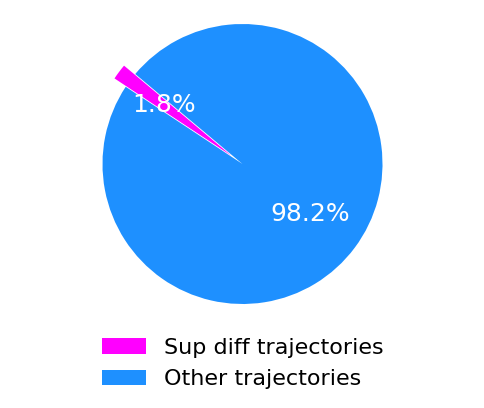

In [6]:
# Create a pie chart
labels = 'Sup diff trajectories', 'Other trajectories'
sizes = [percentage_flagged, percentage_unflagged]
colors = ['magenta', 'dodgerblue']
explode = (0.1, 0)  # Explode the first slice slightly (active transportation)

def make_autopct_white(pct):
    return f'{pct:.1f}%'

# Create the pie chart with the specified aesthetics
plt.figure(figsize=(6, 4))
wedges, texts, autotexts = plt.pie(
    sizes, explode=explode, labels=None, colors=colors, autopct=make_autopct_white,
    shadow=False, startangle=140, textprops={'fontsize': 18}
)

# Change the text color inside the pie chart to white
for autotext in autotexts:
    autotext.set_color('white')

# Add a legend
plt.legend(labels, loc="upper center", bbox_to_anchor=(0.5, 0), fontsize=16, frameon=False, ncol=1)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Customize plot appearance
for spine in plt.gca().spines.values():
    spine.set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=18,
    direction="in",
    bottom=True,
    left=True,
    length=5, 
    width=1,   
)
plt.gca().set_axisbelow(False)

# Save the plot
plt.savefig("pie_chart.png", format="png", bbox_inches="tight", dpi=600)

# Show the plot
plt.show()
# Show the plot
plt.show()